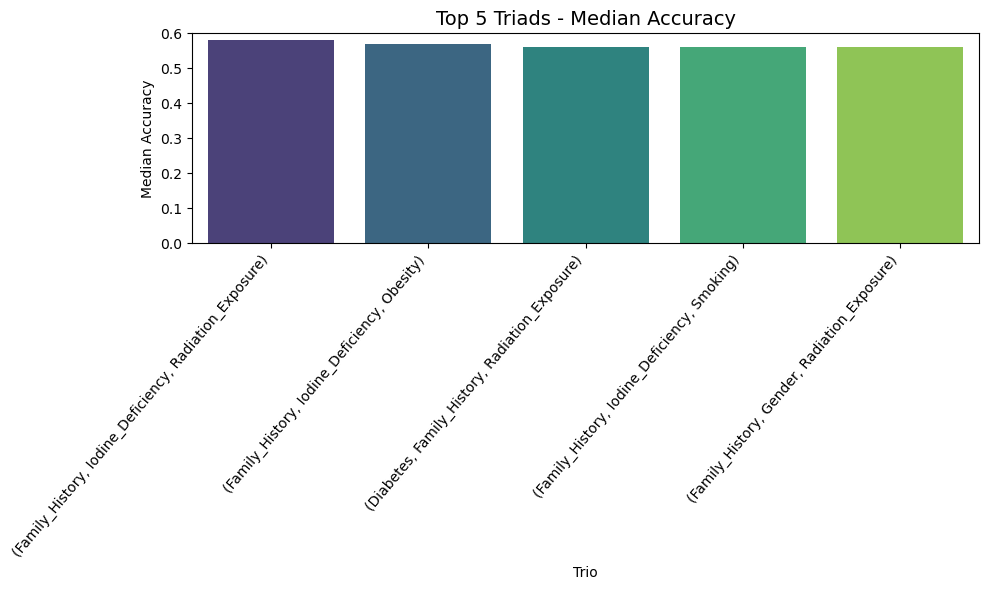

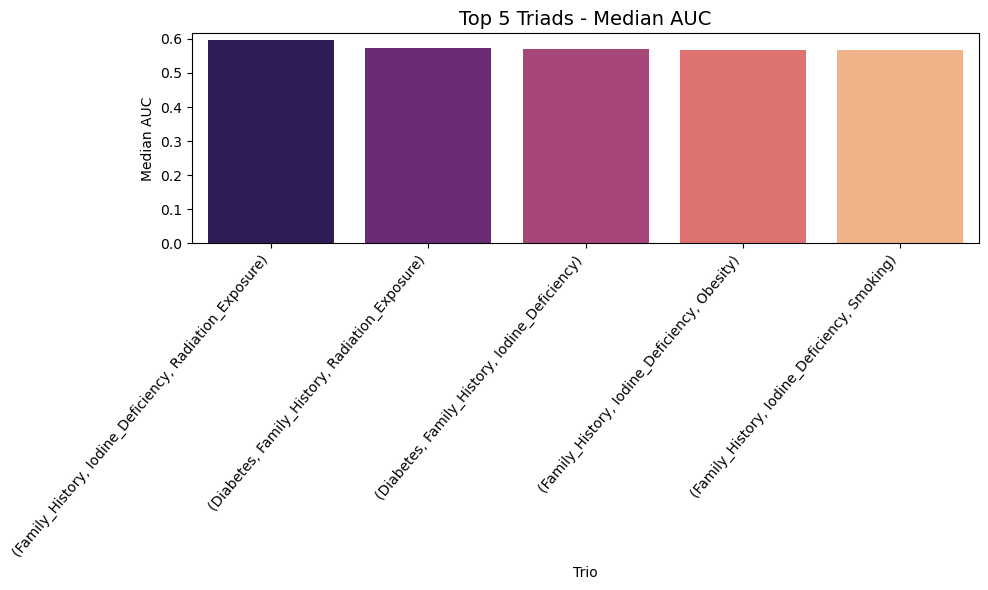

In [1]:
import pandas as pd #Εισαγωγή Pandas ως κύρια βιβλιοθήκη για διαχείριση/ανάλυση πινάκων δεδομένων (DataFrames)
import matplotlib.pyplot as plt #Εισαγωγή γενικής βιβλιοθήκης γραφημάτων (figures, άξονες, αποθήκευση).
import seaborn as sns #Εισαγωγή Seaborn για την εξαγωγή Boxplots.
import warnings
warnings.filterwarnings('ignore') #Επειδή ο κώδικας μπορεί να τρέχει σε διαφορετικά api (application programming interfaces)
#γίνεται εισαγωγή του συγκεκριμένου module warnings με σκοπό να μην εμφανίζονται σχετικές προειδοποιήσεις. 

#Εισαγωγή Δεδομένων
data = {  #Ορισμός πίνακα (λεξικού) με τις τριάδες και μετρικές που ανέδειξε ο Random Forest. 
    "Trio": [
        "(Family_History, Iodine_Deficiency, Radiation_Exposure)",
        "(Family_History, Iodine_Deficiency, Obesity)",
        "(Diabetes, Family_History, Radiation_Exposure)",
        "(Family_History, Iodine_Deficiency, Smoking)",
        "(Family_History, Gender, Radiation_Exposure)",
        "(Family_History, Radiation_Exposure, Smoking)",
        "(Diabetes, Family_History, Iodine_Deficiency)",
        "(Iodine_Deficiency, Obesity, Radiation_Exposure)",
        "(Family_History, Obesity, Radiation_Exposure)",
        "(Family_History, Gender, Iodine_Deficiency)"
    ],
    "Median_Accuracy": [0.580, 0.570, 0.560, 0.560, 0.560, 0.560, 0.555, 0.550, 0.550, 0.540], #Εισαγωγή τιμών Accuracy
    "Median_AUC": [0.596154, 0.568510, 0.572115, 0.568510, 0.564503, 
                   0.558894, 0.569712, 0.560096, 0.556490, 0.551683] #Εισαγωγή τιμών AUC
}

df = pd.DataFrame(data) #Μετατροπή σε dataframe για ευκολη ταξινόμηση/σχεδίαση. 

# ----- Top 5 Accuracy -----
top5_acc = df.sort_values(by="Median_Accuracy", ascending=False).head(5)  # Επιλογή των πέντε τριάδων με την υψηλότερη Median_Accuracy
plt.figure(figsize=(10, 6))  # Ορισμός μεγέθους καμβά - πιο πλατύ γράφημα
sns.barplot(data=top5_acc, x="Trio", y="Median_Accuracy",
            palette="viridis",  #Χρήση της έτοιμης παλέτας "viridis" της Seaborn η οποία εχει συνεχή διαβάθμιση απο σκούρο μπλέ σε πρασινο και κίτρινο
            order=top5_acc["Trio"], width=0.8) # Καθορισμός πάχους μπάρας

# Τίθεται το άνω όριο του άξονα y, προσθέτοντας ένα μικρό περιθώριο ώστε οι μπάρες να μην ακουμπούν στο ανώτατο όριο.
plt.ylim(0, top5_acc["Median_Accuracy"].max() + 0.02)
# Ορισμός τίτλου γραφήματος με μέγεθος γραμματοσειράς 14 για καλύτερη αναγνωσιμότητα.
plt.title("Top 5 Triads - Median Accuracy", fontsize=14)

plt.ylabel("Median Accuracy") # Ορισμός της ετικέτας του κατακόρυφου άξονα (y-axis).
plt.xlabel("Trio") # Ορισμός της ετικέτας του οριζόντιου άξονα (x-axis).
plt.xticks(rotation=50, ha='right') # Περιστροφή των ετικετών του x-axis κατά 50 μοίρες στοιχίζοντας τες δεξιά.
plt.tight_layout() #Αυτόματη προσαρμογή περιθωρίων ώστε να μην επικαλύπτονται τίτλοι, άξονες ή ετικέτες.
plt.show() # Εμφάνιση του γραφήματος στην οθόνη.

print("\n\n")

# ----- Top 5 AUC -----
top5_auc = df.sort_values(by="Median_AUC", ascending=False).head(5) # Επιλογή των πέντε τριάδων με την υψηλότερη Median AUC.
plt.figure(figsize=(10, 6)) #Δημιουργία νέου καμβά  ίδιων διαστάσεων.
sns.barplot(data=top5_auc, x="Trio", y="Median_AUC",  # Σχεδιάσμός barplot για τις κορυφαίες τριάδες με βάση την AUC,
            palette="magma",                  #Χρήση της έτοιμης παλέτας "magma" της Seaborn η οποία εχει συνεχή διαβάθμιση απο σκούρο μοβ σε πορτοκαλι
            order=top5_auc["Trio"], width=0.8) # Καθορισμός πάχους μπάρας

# Τίθεται το άνω όριο του άξονα y, προσθέτοντας ένα μικρό περιθώριο ώστε οι μπάρες να μην ακουμπούν στο ανώτατο όριο.
plt.ylim(0, top5_auc["Median_AUC"].max() + 0.02)
#Ορισμός τίτλου  γραφήματος με μέγεθος γραμματοσειράς 14 για καλύτερη αναγνωσιμότητα.
plt.title("Top 5 Triads - Median AUC", fontsize=14)

plt.ylabel("Median AUC")  # Ορισμός της ετικέτας του κατακόρυφου άξονα (y-axis).
plt.xlabel("Trio") # Ορισμός της ετικέτας του οριζόντιου άξονα (x-axis).
plt.xticks(rotation=50, ha='right') # Περιστροφή των ετικετών του x-axis κατά 50 μοίρες στοιχίζοντας τες δεξιά.
plt.tight_layout() #Αυτόματη προσαρμογή περιθωρίων ώστε να μην επικαλύπτονται τίτλοι, άξονες ή ετικέτες.
plt.show() # Εμφάνιση του γραφήματος στην οθόνη.
